# **Sentiment Analysis**

**Cleaning the text cols**

- Lemmatization/Stemming

- Removing stop words

- POS Tagging

- NER Recognition

- TF-IDF/Word embedding (quantification)

**What I want to do**

- Want to see the positive/negative/neutral texts (then test on a random review set to see how accurate this model is)

- What are people saying before and after covid

In [ ]:
import pandas as pd
import numpy as np
import spacy

In [ ]:
!python -m spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 2.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
file =  r'CIS509_workingfile.json'
df = pd.read_json(file, lines= True)

In [ ]:
df.tail(2)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars_x,review_count,...,review_id,user_id,stars_y,useful,funny,cool,text,date,year,month
42420,uriD7RFuHhLJeDdKaf0nFA,Pizza Guru,3534 State St,Santa Barbara,CA,93105,34.440689,-119.739681,4.0,299,...,VKNMZ5ITllRZ7e1lBi4EOQ,qW-Q3krGy2FgY1ouN0znjQ,5,1,0,0,Santa Barbara has lots of good pizza. \nThis o...,2018-10-18 20:35:16,2018,10
42421,uriD7RFuHhLJeDdKaf0nFA,Pizza Guru,3534 State St,Santa Barbara,CA,93105,34.440689,-119.739681,4.0,299,...,TaUkKNCcK_yVNst35g7fLw,avcQbkVRQ0skWZS1rkoAQg,4,8,5,6,Solid pizza and beer at Pizza Guru. I choose ...,2018-07-22 13:31:09,2018,7


In [ ]:
pip install nltk

- **Text preprocessing**

In [ ]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def preprocess_text(text):
    # Lowercasing
    text = text.lower()

    # Removing special characters like emojis
    text = text.encode('ascii', 'ignore').decode()

    # Removing punctuation
    text = re.sub(r'[^\w\s]', '', text)

    # Tokenization
    tokens = word_tokenize(text)

    # Removing stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Join the tokens back into a single string
    processed_text = ' '.join(tokens)

    return processed_text

# Example usage:
# Assuming 'df' is your DataFrame with a column 'text'
# Apply the preprocessing function to the 'text' column
df['processed_text'] = df['text'].apply(preprocess_text)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
df.tail(1)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars_x,review_count,...,user_id,stars_y,useful,funny,cool,text,date,year,month,processed_text
42421,uriD7RFuHhLJeDdKaf0nFA,Pizza Guru,3534 State St,Santa Barbara,CA,93105,34.440689,-119.739681,4.0,299,...,avcQbkVRQ0skWZS1rkoAQg,4,8,5,6,Solid pizza and beer at Pizza Guru. I choose ...,2018-07-22 13:31:09,2018,7,solid pizza beer pizza guru choose bbq pizza m...


In [ ]:
df.dtypes

business_id               object
name                      object
address                   object
city                      object
state                     object
postal_code                int64
latitude                 float64
longitude                float64
stars_x                  float64
review_count               int64
is_open                    int64
attributes                object
categories                object
hours                     object
review_id                 object
user_id                   object
stars_y                    int64
useful                     int64
funny                      int64
cool                       int64
text                      object
date              datetime64[ns]
year                       int64
month                      int64
processed_text            object
dtype: object

In [ ]:
# Save into CSV file in case takes too long

csv_file_path = "processed_and_quantified.csv"

# Convert the DataFrame to a CSV file
df.to_csv(csv_file_path, index=False)

# Print a message indicating the successful conversion
print(f"Dataset has been successfully converted to {csv_file_path}")

Dataset has been successfully converted to processed_and_quantified.csv


- **Conducting sentiment analysis on my quantified data**

- Using Vader Sentiment (use polarity scores)

In [ ]:
pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.6 MB/s eta 0:00:00


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Create an instance of the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to get sentiment score for each text
def get_sentiment_score(text):
    return analyzer.polarity_scores(text)['compound']

# Apply sentiment analysis to each text in the 'processed_text' column
df['sentiment_score'] = df['processed_text'].apply(get_sentiment_score)


                  business_id        name        address           city state  \
42421  uriD7RFuHhLJeDdKaf0nFA  Pizza Guru  3534 State St  Santa Barbara    CA   

       postal_code   latitude   longitude  stars_x  review_count  ...  \
42421        93105  34.440689 -119.739681      4.0           299  ...   

       stars_y useful funny cool  \
42421        4      8     5    6   

                                                    text                date  \
42421  Solid pizza and beer at Pizza Guru.  I choose ... 2018-07-22 13:31:09   

       year  month                                     processed_text  \
42421  2018      7  solid pizza beer pizza guru choose bbq pizza m...   

       sentiment_score  
42421           0.5423  

[1 rows x 26 columns]


- positive sentiment: compound score >= 0.05
- neutral sentiment: (compound score > -0.05) and (compound score < 0.05)
- negative sentiment: compound score <= -0.05

In [ ]:
# Display the DataFrame with sentiment scores
df.tail(1)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars_x,review_count,...,stars_y,useful,funny,cool,text,date,year,month,processed_text,sentiment_score
42421,uriD7RFuHhLJeDdKaf0nFA,Pizza Guru,3534 State St,Santa Barbara,CA,93105,34.440689,-119.739681,4.0,299,...,4,8,5,6,Solid pizza and beer at Pizza Guru. I choose ...,2018-07-22 13:31:09,2018,7,solid pizza beer pizza guru choose bbq pizza m...,0.5423


In [ ]:
# Function to label sentiment based on polarity scores
def label_sentiment(score):
    if score >= 0.5:
        return 'positive'
    elif score <= -0.5:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment labeling to the existing polarity scores column
df['sentiment_label'] = df['sentiment_score'].apply(label_sentiment)

df.tail(1)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars_x,review_count,...,useful,funny,cool,text,date,year,month,processed_text,sentiment_score,sentiment_label
42421,uriD7RFuHhLJeDdKaf0nFA,Pizza Guru,3534 State St,Santa Barbara,CA,93105,34.440689,-119.739681,4.0,299,...,8,5,6,Solid pizza and beer at Pizza Guru. I choose ...,2018-07-22 13:31:09,2018,7,solid pizza beer pizza guru choose bbq pizza m...,0.5423,positive


In [ ]:
# Save into CSV file in case takes too long

csv_file_path = "processed_sentiment.csv"

# Convert the DataFrame to a CSV file
df.to_csv(csv_file_path, index=False)

# Print a message indicating the successful conversion
print(f"Dataset has been successfully converted to {csv_file_path}")

Dataset has been successfully converted to processed_sentiment.csv


- Count the number of positive/negative/neutral reviews

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
file =  r'processed_sentiment.csv'
df = pd.read_csv(file)

In [ ]:
df.tail(1)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars_x,review_count,...,useful,funny,cool,text,date,year,month,processed_text,sentiment_score,sentiment_label
42421,uriD7RFuHhLJeDdKaf0nFA,Pizza Guru,3534 State St,Santa Barbara,CA,93105,34.440689,-119.739681,4.0,299,...,8,5,6,Solid pizza and beer at Pizza Guru. I choose ...,2018-07-22 13:31:09,2018,7,solid pizza beer pizza guru choose bbq pizza m...,0.5423,positive


In [ ]:
# Filter to just 2018

# Filter the DataFrame to include only rows where 'year' is equal to 2018
df_2018 = df[df['year'] == 2018]

# Now df_2018 contains only the rows where 'year' is 2018

In [ ]:
df_2018.shape

(23061, 27)

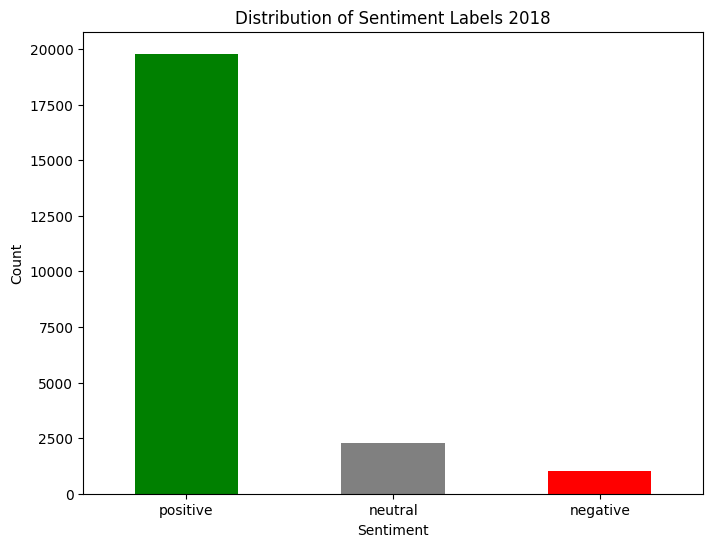

In [ ]:
import matplotlib.pyplot as plt

# Count the number of positive, negative, and neutral reviews
sentiment_counts = df_2018['sentiment_label'].value_counts()

# Plot the counts
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'gray', 'red'])
plt.title('Distribution of Sentiment Labels 2018')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

In [ ]:
# Filter to just 2021

# Filter the DataFrame to include only rows where 'year' is equal to 2021
df_2021 = df[df['year'] == 2021]

df_2021.shape

(19361, 27)

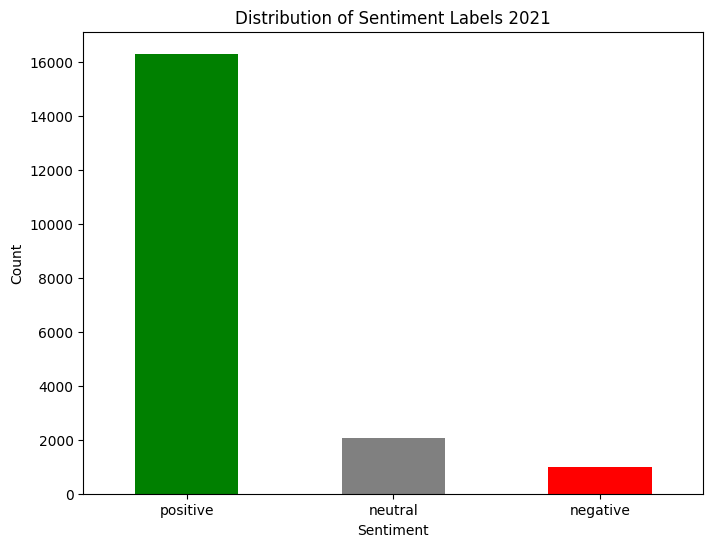

In [ ]:
import matplotlib.pyplot as plt

# Count the number of positive, negative, and neutral reviews
sentiment_counts = df_2021['sentiment_label'].value_counts()

# Plot the counts
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'gray', 'red'])
plt.title('Distribution of Sentiment Labels 2021')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

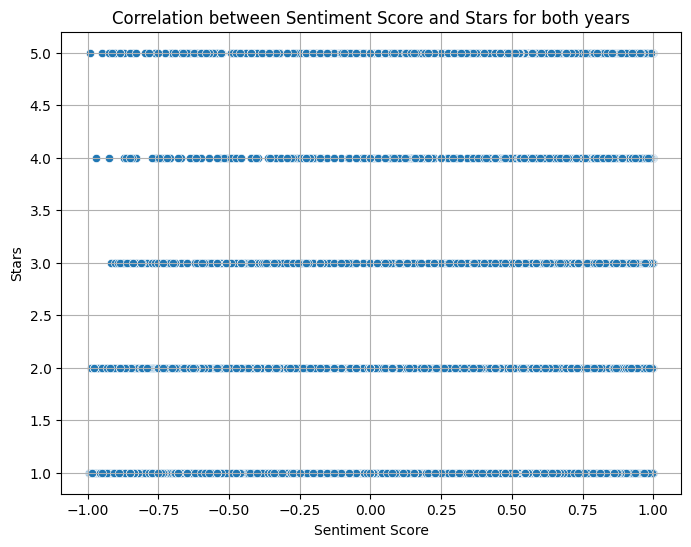

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot correlation graph
plt.figure(figsize=(8, 6))
sns.scatterplot(x='sentiment_score', y='stars_y', data=df)
plt.title('Correlation between Sentiment Score and Stars for both years')
plt.xlabel('Sentiment Score')
plt.ylabel('Stars')
plt.grid(True)
plt.show()


- Didn't want to do sentiment analysis just based on the star rating because often times people don't know how to rate eventhough they give a really bad review. Hence the correlation graph above which proves out point, we manually checked through as well and it also proved our hypothesis